In [8]:
import pandas as pd

import psycopg2

conn = psycopg2.connect(dbname="fakenewsdb", user="postgres", password="1234")

cursor = conn.cursor()

In [14]:
query_article_dist = """
    SELECT type, COUNT(*) AS count
    FROM fnc_article
    GROUP by type
"""

cursor.execute('rollback')
cursor.execute(query_article_distribution)
cursor.fetchall()

[('NaN', 17674),
 ('bias', 27561),
 ('clickbait', 4478),
 ('conspiracy', 21893),
 ('fake', 24805),
 ('hate', 737),
 ('junksci', 3544),
 ('political', 58015),
 ('reliable', 1302),
 ('rumor', 9315),
 ('satire', 2875),
 ('unreliable', 28406)]

<AxesSubplot:xlabel='type'>

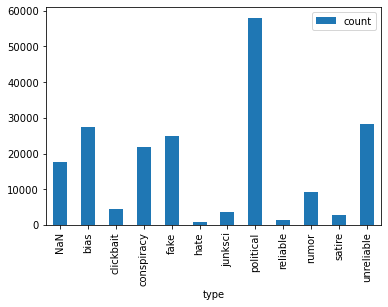

In [17]:
df_article_dist = pd.read_sql(query_article_dist, conn)
df_article_dist.plot.bar(x = 'type')

In [25]:
query_duplicates = """
  SELECT type, COUNT(content) AS count
  FROM fnc_article
  GROUP BY type
  HAVING COUNT(content) > 1
"""
cursor.execute('rollback')
cursor.execute(query_duplicates)
cursor.fetchall()

[("\n\n\n\n\n\nJames Murtagh ((# of views)) I have 8 fans:\n\n\n\nBecome a Fan.\n\nYou'll get emails whenever I post articles on OpEdNews James J. Murtagh, Jr. is a doctor of pulmonary, critical care and sleep medicine, and the Medical Director of several sleep laboratories in Southern Ohio. Dr. Murtagh extensively writes on medical ethics. Dr. Murtagh is the founder of a new company launched August 3, 2011 to promote innovative methods to treat sleep disorders. Dr. Murtagh maintains a consulting service with Georgians for Justice to advocate for dignity and respect for all healthcare workers and patients, and to protect electronic privacy. OpEdNews Member for 557 week(s) and 0 day(s) 63 Articles, 0 Quick Links, 206 Comments, 0 Diaries, 0 Polls",
  2),
 ('\n\n\n\n\n\nTwo days before this "book" comes out. Can\'t wait for whatever is next for the Republican Weekly Reader crowd. Bob Novak\'s "100 Fat People Named Kennedy That Pissed In Your Soup"? Fred Barnes\' "All The Liberal Corporate

In [ ]:
# QUERY 1

query1 = """
    SELECT distinct domain, type, scraped_at 
    FROM article
    WHERE type = 'reliable' AND scraped_at >= '2018-01-15'
"""

cursor.execute('rollback')
cursor.execute(query1)
cursor.fetchall()

In [ ]:
# QUERY 2

query2 = """
    SELECT authors
    FROM (
        SELECT COUNT(a_id) AS cnt, authors 
        FROM authors 
        WHERE a_id IN (
            SELECT id
            FROM article
            WHERE type = 'fake'
        ) 
        GROUP BY authors
    ) AS x
    WHERE cnt = (SELECT MAX(cnt) FROM x)
"""

# This gives a max, but doesnt take into account if multiple authors write max number of fake articles
query2_pseudomax = """
    SELECT COUNT(a_id), authors 
    FROM authors 
    WHERE a_id IN (
        SELECT id
        FROM article
        WHERE type = 'fake'
    )
    GROUP BY authors ORDER BY COUNT(a_id) DESC LIMIT 1
"""

cursor.execute('rollback')
cursor.execute(query2_pseudomax)
cursor.fetchall()

In [ ]:
# QUERY 3 - Need to join the metakeywords table on id and concatenate a single strings with keywords sorted in alphabetical order
# then we can use that to compare with other entries in the tables - Didnt have time to finish

query3 = """
    SELECT a_id, COUNT(*)
    FROM metakeywords
    GROUP BY a_id, mkeyword
    HAVING COUNT(*) > 1
"""

cursor.execute('rollback')
cursor.execute(query3)
cursor.fetchall()

In [ ]:
# QUERY 1 - FINDING THE TOP 3 DOMAIN PUBLISHING THE MOST FAKE ARTICLES
q1 = """
    SELECT COUNT(id), domain
    FROM article
    WHERE id IN (
        SELECT id
        FROM article
        WHERE type = 'fake'
    )
    GROUP BY domain ORDER BY COUNT(id) DESC LIMIT 3
"""

cursor.execute('rollback')
cursor.execute(q1)
cursor.fetchall()

In [ ]:
# QUERY 2 - WHICH TYPE OF ARTICLES IS DONALD TRUMP MOST OFTEN MENTIONED IN

q2 = """
    SELECT COUNT(id), type
    FROM (
      SELECT id, type, domain
      FROM artikel
      WHERE title LIKE '%trump%'
    ) as x
    GROUP BY type  ORDER BY COUNT(id) DESC LIMIT 3
"""

cursor.execute('rollback')
cursor.execute(q2)
cursor.fetchall()